<br><br>
<font size='6'><b>(Artificial) Neural Networks in TensorFlow
</b></font><br><br>

<table style="border-style: hidden; border-collapse: collapse;" width = "100%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 65% style="border-style: hidden; border-collapse: collapse;">

        </td>
        <td width = 35%>
        By Prof. Seungchul Lee<br>iSystems Design Lab<br>http://isystems.unist.ac.kr/<br>UNIST
        </td>
    </tr>
</table>

<table>
</table>

Table of Contents
<div id="toc"></div>

# 1. Artificial Neural Networks (ANN)

## 1.1 Structure

<img src="./image_files/nn_structure.png" width = 270>

__Transformation__
- Affine (or linear) transformation and nonlinear activation (layer)

$$ f(x) = g\left(\theta^{T}x + b\right) $$

- Nonlinear activation functions

<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 28% style="border-style: hidden; border-collapse: collapse;">
            <img src="./image_files/sigmoid_function.png" width = 250>
            $$ g(x) = \frac{1}{1+e^{-x}}$$
        </td>
        <td width = 28% style="border-style: hidden; border-collapse: collapse;">
            <img src="./image_files/tanh_function.png" width = 250>
            <br>
            $$ g(x) = \tanh (x)$$
        </td>
        <td width = 28% style="border-style: hidden; border-collapse: collapse;">
            <img src="./image_files/relu_function.png" width = 250>
            <br>
            $$ g(x) = \max (0, x)$$
        </td>
    </tr>
</table>


## 1.2. Training Neural Networks

__Loss Function__

- Measures error between target values and predictions

$$ \min_{\theta} \sum_{i=1}^{m}\ell\left( h_{\theta}\left(x^{(i)}\right),y^{(i)}\right)$$

- Example
    - Cross entropy:
    $$ -\frac{1}{N}\sum_{i=1}^{N}y^{(i)}\log\left(h_{\theta}\left(x^{(i)}\right)\right) + \left(1-y^{(i)}\right)\log\left(1-h_{\theta}\left(x^{(i)}\right)\right)$$
    - Squared loss:
    $$  \frac{1}{N} \sum_{i=1}^{N} \left(h_{\theta}\left(x^{(i)}\right) - y^{(i)}\right)^2 $$

__Backpropagation__

- Forward propagation 
    - the initial information propagates up to the hidden units at each layer and finally produces output


- Backpropagation
    - allows the information from the cost to flow backwards through the network in order to compute the gradients

<img src="./image_files/animate_backpropa.gif" width = 450>

__(Stochastic) Gradient Descent__

- Negative gradients points directly downhill of the cost function
- We can decrease the cost by moving in the direction of the negative gradient ($\alpha$ is a learning rate)

<br>
$$ \theta:= \theta - \alpha \nabla_{\theta} \left( h_{\theta} \left(x^{(i)}\right),y^{(i)}\right)$$

<br>
<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
            <img src="./image_files/GradientDescent.png" width = 450>
        </td>
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
            <img src="./image_files/GradientDescent_3d.png" width = 450>
        </td>
    </tr>
</table>

# 2. Deep Learning Libraries

__Caffe__

<img src="./image_files/Caffe_logo.png" width = 200>

- Platform: Linux, Mac OS, Windows
- Written in: C++
- Interface: Python, MATLAB

<br>
__Theano__
<img src="./image_files/Theano_logo.png" width = 200>

- Platform: Cross-platform
- Written in: Python
- Interface: Python

<br>
__Tensorflow__

<img src="./image_files/Tensorflow_logo.png" width = 250>

- Platform: Linux, Mac OS, Windows
- Written in: C++, Python
- Interface: Python, C/C++, Java, Go, R


# 3. TensorFlow

- `tensorflow` is an open-source software library for deep learning.

## 3.1. Computational Graph
- `tf.constant`
- `tf.Variable`
- `tf.placeholder`

In [1]:
import tensorflow as tf

a = tf.constant([1, 2, 3])
b = tf.constant([4, 5, 6])

A = a + b
B = a * b

In [2]:
A

<tf.Tensor 'add:0' shape=(3,) dtype=int32>

In [3]:
B

<tf.Tensor 'mul:0' shape=(3,) dtype=int32>

To run any of the three defined operations, we need to create a session for that graph. The session will also allocate memory to store the current value of the variable.

<img src="./image_files/tf_session.png" width="600">

In [4]:
sess = tf.Session()
sess.run(A)

array([5, 7, 9], dtype=int32)

In [5]:
sess.run(B)

array([ 4, 10, 18], dtype=int32)

`tf.Variable` is regarded as the decision variable in optimization. We should initialize variables to use `tf.Variable`.

In [6]:
w = tf.Variable([1, 1])

In [7]:
init = tf.global_variables_initializer()
sess.run(init)

In [8]:
sess.run(w)

array([1, 1], dtype=int32)

The value of __`tf.placeholder`__ must be fed using the `feed_dict` optional argument to `Session.run()`.

In [9]:
x = tf.placeholder(tf.float32, [2, 2])

In [10]:
sess.run(x, feed_dict={x : [[1,2],[3,4]]})

array([[ 1.,  2.],
       [ 3.,  4.]], dtype=float32)

## 3.2. Example: Linear Regression using TensorFlow 

$\text{Given} \; \begin{cases}
x_{i} \; \text{: inputs} \\
y_{i} \; \text{: outputs}
\end{cases}$
, Find $\omega_{1}$ and $\omega_{2}$


$$x=
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{m}
\end{bmatrix}, \qquad
y=
\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{m}
\end{bmatrix}\quad \approx \quad
\hat{y}_{i} =  \omega_{1}x_{i} + \omega_{2} $$

- $ \hat{y}_{i} $ : predicted output 

- $ \omega = 
\begin{bmatrix}
\omega_{1} \\
\omega_{2} \\
\end{bmatrix}
$ : Model parameters

$$ \hat{y}_{i} = f(x_{i}, \omega) \; \text{ in general}$$

- in many cases, a linear model to predict $y_{i}$ is used


$$ \hat{y}_{i} = \omega_{1}x_{i} + \omega_{2} \; \text{  such that  } \min\limits_{\omega_{1}, \omega_{2}}\sum\limits_{i = 1}^{m} (\hat{y}_{i} - y_{i})^2$$

<table style='border-style: hidden; border-collapse: collapse;' width = 900> 
    <tr>
        <td width = 400 style='border-style: hidden; border-collapse: collapse;'>
            <img src='./image_files/linear_regression02.jpg' width = 300>
        </td>       
        <td width = 400>
            <img src='./image_files/linear_regression.png' width = 300>
        </td>
    </tr>
</table>

__Data Generation__

In [11]:
import numpy as np
print(np.random.rand(10))
print(np.random.randint(0,10,size=10))

[ 0.27098675  0.21754601  0.41944352  0.08300761  0.89849646  0.12439775
  0.92244054  0.87832082  0.53466978  0.76806676]
[9 5 1 3 0 7 2 0 5 3]


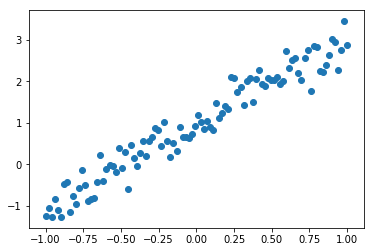

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
 
data_x = np.linspace(-1, 1, 100)
data_y = 2 * data_x + 1 + np.random.randn(*data_x.shape) * 0.3
 
plt.scatter(data_x, data_y)
plt.show()

__Prameter Learning (or Estimation) by using TensorFlow__

In [13]:
# Define decision variables in tf

weights = {
    'w' : tf.Variable(tf.random_normal([1], stddev=0.1))
}
biases = {
    'b' : tf.Variable(tf.random_normal([1], stddev=0.1))
}

In [14]:
x = tf.placeholder(tf.float32, [10])
y = tf.placeholder(tf.float32, [10]) 

$\hat{y}_{i} = \omega x_{i} + b$

In [15]:
# define model

def model(x, weights, biases):
    output = tf.add(tf.multiply(x, weights['w']), biases['b'])
    return output 

$\min\limits_{\omega, b} \frac{1}{m} \sum\limits_{i = 1}^{m} (y_{i} - \hat{y}_{i} )^2$

In [16]:
# define loss

pred = model(x, weights, biases)
loss = tf.square(tf.subtract(y, pred))
loss = tf.reduce_mean(loss)

In [17]:
# define optimizer

LR = 0.04
# optm = tf.train.AdamOptimizer(LR).minimize(loss) 
optm = tf.train.GradientDescentOptimizer(LR).minimize(loss)

In [18]:
# tf.Variable initializer

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [19]:
# optimizing

n_iter = 200
n_prt = 20

for epoch in range(n_iter):
    idx = np.random.randint(0, 100, 10)
    train_x, train_y = data_x[idx], data_y[idx]
    sess.run(optm, feed_dict={x: train_x, y: train_y})
    
    if epoch % n_prt == 0:
        c = sess.run(loss, feed_dict={x: train_x, y: train_y})
        print ("Iter : {}".format(epoch))
        print ("Cost : {}".format(c))
        

w_hat = sess.run(weights['w'])
b_hat = sess.run(biases['b'])

sess.close()

Iter : 0
Cost : 2.9457473754882812
Iter : 20
Cost : 0.26229652762413025
Iter : 40
Cost : 0.20252689719200134
Iter : 60
Cost : 0.26667216420173645
Iter : 80
Cost : 0.1807813197374344
Iter : 100
Cost : 0.09943811595439911
Iter : 120
Cost : 0.11535622924566269
Iter : 140
Cost : 0.1078239232301712
Iter : 160
Cost : 0.1471821814775467
Iter : 180
Cost : 0.06574064493179321


w_hat : [ 2.04266238]
b_hat : [ 0.96184987]


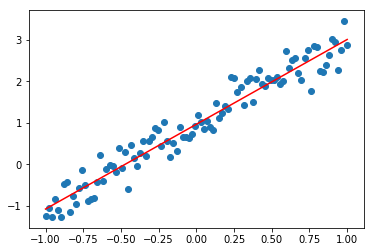

In [20]:
print ("w_hat : {}".format(w_hat))
print ("b_hat : {}".format(b_hat))
    
plt.scatter(data_x, data_y)
learned_y = data_x*w_hat + b_hat
plt.plot(data_x, learned_y, 'r')
plt.show()

# 4. ANN with TensorFlow

- MNIST (Mixed National Institute of Standards and Technology database) database
    - Handwritten digit database
    - $28 \times 28$ gray scaled image
    - Flattened array into a vector of $28 \times 28 = 784$
    
<img src="./image_files/mnist_digits.png" width = 450>

<img src="./image_files/MNIST-Matrix.png" width = 450>

<br>
<img src="./image_files/MNIST_neuralnet_image.png" width = 500>
<br>

In [21]:
%%html
<center><iframe src="https://www.youtube.com/embed/z0bynQjEpII?start=2088&end=3137" 
width="560" height="315" frameborder="0" allowfullscreen></iframe></center>

## 4.1. Import Library

In [22]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## 4.2. Load MNIST Data

- Download MNIST data from tensorflow tutorial example

In [23]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


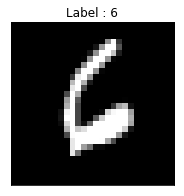

In [24]:
train_x, train_y = mnist.train.next_batch(10)
img = train_x[3,:].reshape(28,28)

plt.figure(figsize=(5,3))
plt.imshow(img,'gray')
plt.title("Label : {}".format(np.argmax(train_y[3])))
plt.xticks([])
plt.yticks([])
plt.show()

One hot encoding

In [25]:
print ('Train labels : {}'.format(train_y[3, :]))

Train labels : [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


## 4.3. Build a Model

__ First, the layer performs several matrix multiplication to produce a set of linear activations __

<img src="./image_files/linear_sum2.png" width = 320>

$$y_j = \left(\sum\limits_i \omega_{ij}x_i\right) + b_j$$

$$\mathcal{y} = \omega^T \mathcal{x} + \mathcal{b}$$

```python
# hidden1 = tf.matmul(x, weights['hidden1']) + biases['hidden1']
hidden1 = tf.add(tf.matmul(x, weights['hidden1']), biases['hidden1'])
```

__ Second, each linear activation is running through a nonlinear activation function __

<img src="./image_files/ReLU.png" width = 500>

```python
hidden1 = tf.nn.relu(hidden1)
```

__Third, predict values with an affine transformation__

<img src="./image_files/classification.png" width = 450>

```python
# output = tf.matmul(hidden1, weights['output']) + biases['output']
output = tf.add(tf.matmul(hidden1, weights['output']), biases['output'])
```

## 4.4. Define the ANN's Shape

- Input size
- Hidden layer size
- The number of classes

<img src="./image_files/MNIST_neuralnet_image.png" width = 500>
<br>

In [26]:
n_input = 28*28
n_hidden1 = 100
n_output = 10

## 4.5. Define Weights, Biases and Network
- Define parameters based on predefined layer size
- Initialize with normal distribution with $\mu = 0$ and $\sigma = 0.1$

In [27]:
weights = {
    'hidden1' : tf.Variable(tf.random_normal([n_input, n_hidden1], stddev = 0.1)),
    'output' : tf.Variable(tf.random_normal([n_hidden1, n_output], stddev = 0.1)),
}

biases = {
    'hidden1' : tf.Variable(tf.random_normal([n_hidden1], stddev = 0.1)),
    'output' : tf.Variable(tf.random_normal([n_output], stddev = 0.1)),
}

x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_output])

In [28]:
# Define Network
def build_model(x, weights, biases):
    # first hidden layer
    hidden1 = tf.add(tf.matmul(x, weights['hidden1']), biases['hidden1'])
    # non linear activate function
    hidden1 = tf.nn.relu(hidden1)
    
    # Output layer with linear activation
    output = tf.add(tf.matmul(hidden1, weights['output']), biases['output'])
    return output

## 4.6. Define Cost, Initializer and Optimizer

__Loss__
- Classification: Cross entropy
    - Equivalent to apply logistic regression
$$ -\frac{1}{N}\sum_{i=1}^{N}y^{(i)}\log(h_{\theta}\left(x^{(i)}\right)) + (1-y^{(i)})\log(1-h_{\theta}\left(x^{(i)}\right)) $$

__Initializer__
- Initialize all the empty variables
    
__Optimizer__
- AdamOptimizer: the most popular optimizer

In [29]:
# Define Cost
LR = 0.0001

pred = build_model(x, weights, biases)
loss = tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y)
loss = tf.reduce_mean(loss)

# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
optm = tf.train.AdamOptimizer(LR).minimize(loss)

init = tf.global_variables_initializer()

## 4.7. Summary of Model

<br>
<img src="./image_files/cnn_summary of model.png" width = 500>
<br>

## 4.8. Define Configuration
- Define parameters for training ANN
     - `n_batch`: batch size for stochastic gradient descent
     - `n_iter`: the number of learning steps
     - `n_prt`: check loss for every `n_prt` iteration

In [30]:
n_batch = 50     # Batch Size
n_iter = 2500    # Learning Iteration
n_prt = 250      # Print Cycle

## 4.9. Optimization

In [31]:
# Run initialize
# config = tf.ConfigProto(allow_soft_placement=True)  # GPU Allocating policy
# sess = tf.Session(config=config)
sess = tf.Session()
sess.run(init)

# Training cycle
for epoch in range(n_iter):
    train_x, train_y = mnist.train.next_batch(n_batch)
    sess.run(optm, feed_dict={x: train_x,  y: train_y}) 
    
    if epoch % n_prt == 0:
        c = sess.run(loss, feed_dict={x : train_x,  y : train_y})
        print ("Iter : {}".format(epoch))
        print ("Cost : {}".format(c))

Iter : 0
Cost : 2.4568586349487305
Iter : 250
Cost : 1.4568665027618408
Iter : 500
Cost : 0.7992963194847107
Iter : 750
Cost : 0.6279309988021851
Iter : 1000
Cost : 0.4135037958621979
Iter : 1250
Cost : 0.4587893784046173
Iter : 1500
Cost : 0.3380467891693115
Iter : 1750
Cost : 0.4487552344799042
Iter : 2000
Cost : 0.39212024211883545
Iter : 2250
Cost : 0.3634752631187439


## 4.10. Test

In [32]:
test_x, test_y = mnist.test.next_batch(100)

my_pred = sess.run(pred, feed_dict={x : test_x})
my_pred = np.argmax(my_pred, axis=1)

labels = np.argmax(test_y, axis=1)

accr = np.mean(np.equal(my_pred, labels))
print("Accuracy : {}%".format(accr*100))

Accuracy : 92.0%


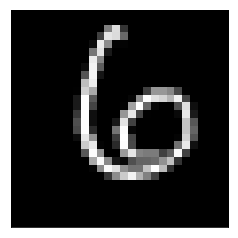

Prediction : 6
Probability : [ 0.    0.01  0.04  0.    0.01  0.    0.93  0.    0.01  0.  ]


In [33]:
test_x, test_y = mnist.test.next_batch(1)
logits = sess.run(tf.nn.softmax(pred), feed_dict={x : test_x})
predict = np.argmax(logits)

plt.imshow(test_x.reshape(28,28), 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

print('Prediction : {}'.format(predict))
np.set_printoptions(precision=2, suppress=True)
print('Probability : {}'.format(logits.ravel()))

In [34]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>